# S1. Measuring Investor's Risk Apetite using JNK/TLT Ratio

In this series, we will be looking at two type of bonds: JNK and TLT.

> **JNK** is the SPDR® Bloomberg Barclays High Yield Bond ETF \
> **TLT** is the iShares 20 Plus Year Treasury Bond ETF

Taking the ratio between JNK and TLT will give an idea of how investors are behaving in a period. The higher the ratio, the more risk averse investors are and vice versa. For this exploratory, we will be downloading historical data of **JNK** and **TLT** from Yahoo Finance.

In [1]:
import pandas as pd
import numpy as np

In [2]:
tlt = pd.read_csv("TLT.csv")
jnk = pd.read_csv("JNK.csv")

In [3]:
tlt.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-07-30,81.750000,81.900002,81.519997,81.519997,42.359905,6100
1,2002-07-31,81.949997,82.800003,81.900002,82.529999,42.884720,29400
2,2002-08-01,82.540001,83.019997,82.540001,83.000000,43.128971,25000
3,2002-08-02,83.160004,84.099998,82.879997,83.849998,43.570641,52800
4,2002-08-05,84.040001,84.440002,83.849998,84.220001,43.762890,61100


In [4]:
jnk.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-12-04,142.800003,143.669998,142.800003,143.669998,52.615807,633
1,2007-12-05,143.699997,143.699997,143.699997,143.699997,52.626774,2000
2,2007-12-06,143.220001,143.339996,143.220001,143.339996,52.494946,1033
3,2007-12-07,143.399994,143.429993,143.399994,143.429993,52.527901,4267
4,2007-12-10,143.759995,144.119995,143.759995,144.119995,52.780586,2567


## A. Processing Data

Taking the ratio **JNK/TLT** for `Open`, `High`, `Low`, and `Close`

In [5]:
col_name = ["Open","High","Low","Close"]

for col in col_name:
    globals()["Ratio_"+col] = jnk[col]/tlt[col]

data = pd.concat([jnk.Date,Ratio_Open,Ratio_High,Ratio_Low,Ratio_Close],axis=1)
print("Data Dims:",data.shape)
data.head()

Data Dims: (4842, 5)


,Date,Open,High,Low,Close
0,2007-12-04,1.746789,1.754212,1.751717,1.762390
1,2007-12-05,1.753508,1.735507,1.754579,1.741185
2,2007-12-06,1.735159,1.726572,1.735159,1.726988
3,2007-12-07,1.724387,1.705470,1.730212,1.710555
4,2007-12-10,1.710614,1.706774,1.714490,1.711232


In [6]:
data.dropna(inplace=True)

print("Data Dims:",data.shape)

Data Dims: (3495, 5)


Checking Data Types and Converting Date into a Datetime Feature

In [7]:
data.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [8]:
data.Date = pd.to_datetime(data.Date)
data.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

## B. Creating Matplotlib Candlestick Chart

In [9]:
#pip install --upgrade mplfinance

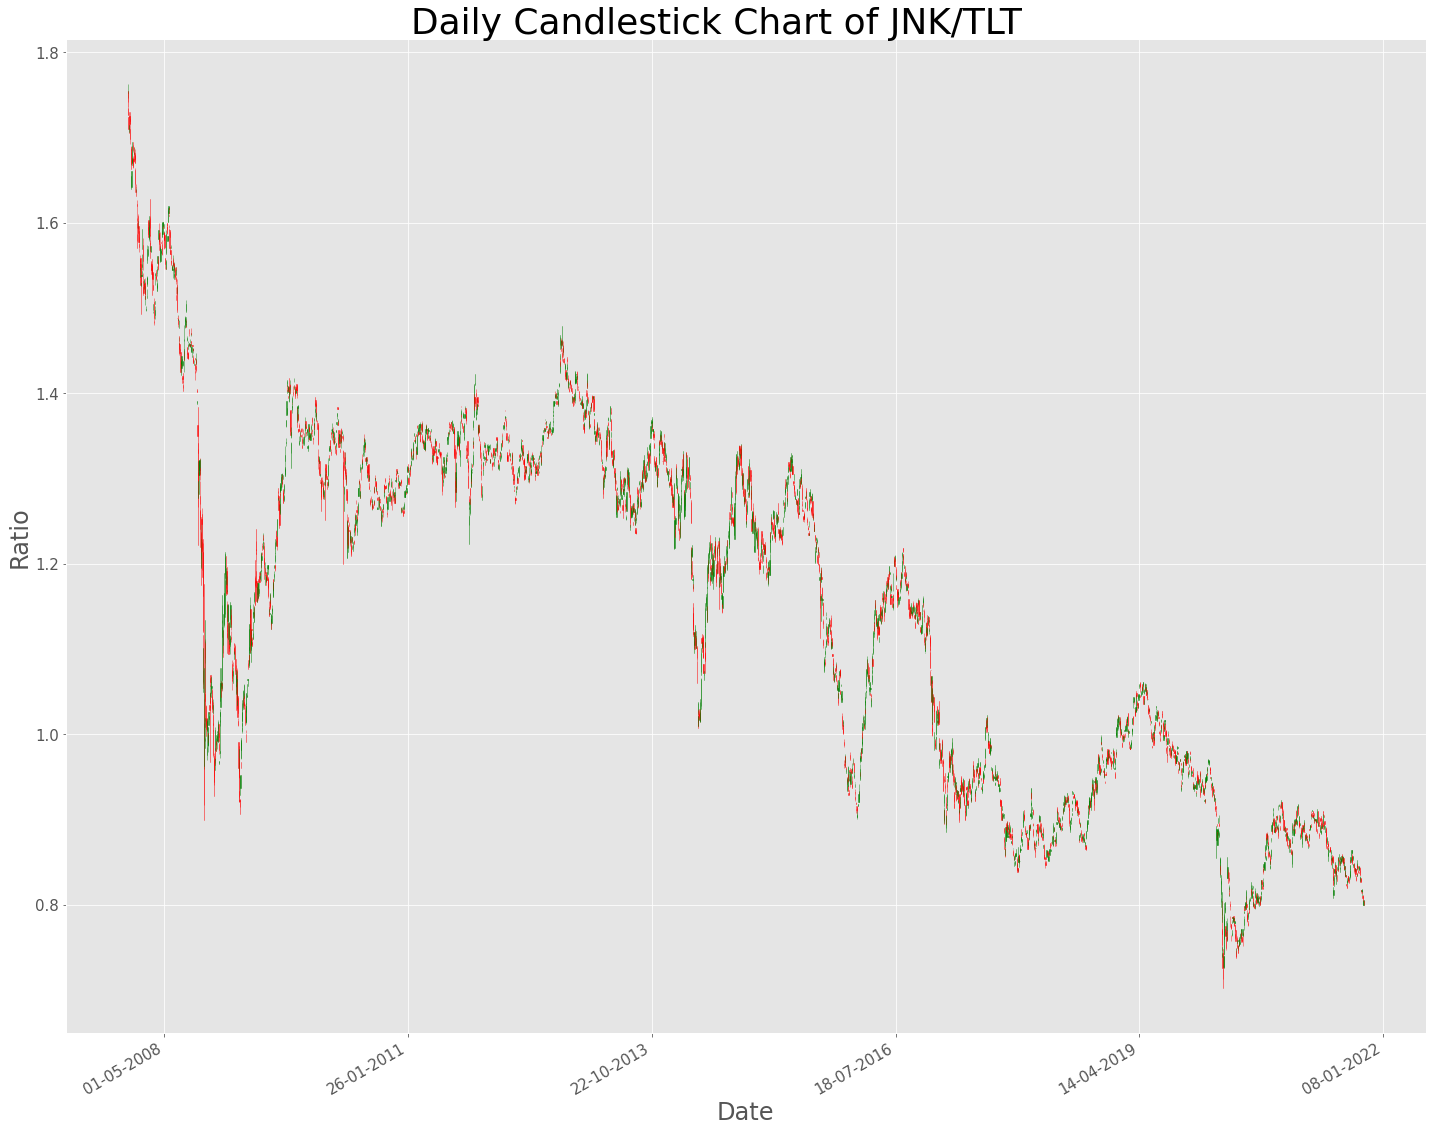

In [10]:
# python_candlestick_chart.py

import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates

plt.style.use('ggplot')

# Extracting Data for plotting
chart=data.copy()
chart['Date'] = chart['Date'].apply(mpl_dates.date2num)
chart = chart.astype(float)

# Creating Subplots
fig, ax = plt.subplots(figsize=(20,16))

candlestick_ohlc(ax, chart.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

# Setting labels & titles
plt.xlabel('Date',fontsize=24)
plt.ylabel('Ratio',fontsize=24)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.suptitle('Daily Candlestick Chart of JNK/TLT',fontsize=36)

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

plt.show()

## C. Analyzing Chart

Maximum and minimum **JNK/TLT** ratio.

In [11]:
data[data.Open == data.Open.max()]

,Date,Open,High,Low,Close
1,2007-12-05,1.753508,1.735507,1.754579,1.741185


In [12]:
data[data.Open == data.Open.min()]

,Date,Open,High,Low,Close
3095,2020-03-23,0.726174,0.72509,0.702237,0.712889


The highest ratio (based on available data) was nearing the housing market crash in 2008 and the lowest ratio was during the recent rotation in March from growth to value stocks. 

Let's attempt to plot support and resistance lines to visualize better.

In [13]:
#First point
point1 = list(chart.loc[1,["Date","Open"]])

#Second point between 26 Jan 2011 and 22 Oct 2013
second_idx = data[('2011-01-26' < data.Date) & (data.Date <'2013-10-22')]["Open"].idxmax()
point2 = list(chart.loc[second_idx,["Date","Open"]])

print("First Point:", point1)
print("Second Point:", point2)

First Point: [13852.0, 1.7535082643139084]
Second Point: [15628.0, 1.4644498838373599]


The line resulted from these two points needs to be extended by first finding the gradient and y-intercept or simply the line equation.

In [14]:
#Finding Gradient
grad = (point1[1]-point2[1])/(point1[0]-point2[0])
intercept = point2[1] - grad*point2[0]

print("Gradient:", grad)
print("Intercept:",intercept)
print(f"Line Eq: y = {grad}x + {intercept}")

Gradient: -0.00016275809711517372
Intercept: 4.008033425553295
Line Eq: y = -0.00016275809711517372x + 4.008033425553295


In [15]:
chart.Date.max()

18920.0

In [16]:
#Third point
point3 = [20000,grad*20000+intercept]
point3

[20000, 0.7528714832498205]

Visualizing the resistance line in the overall chart

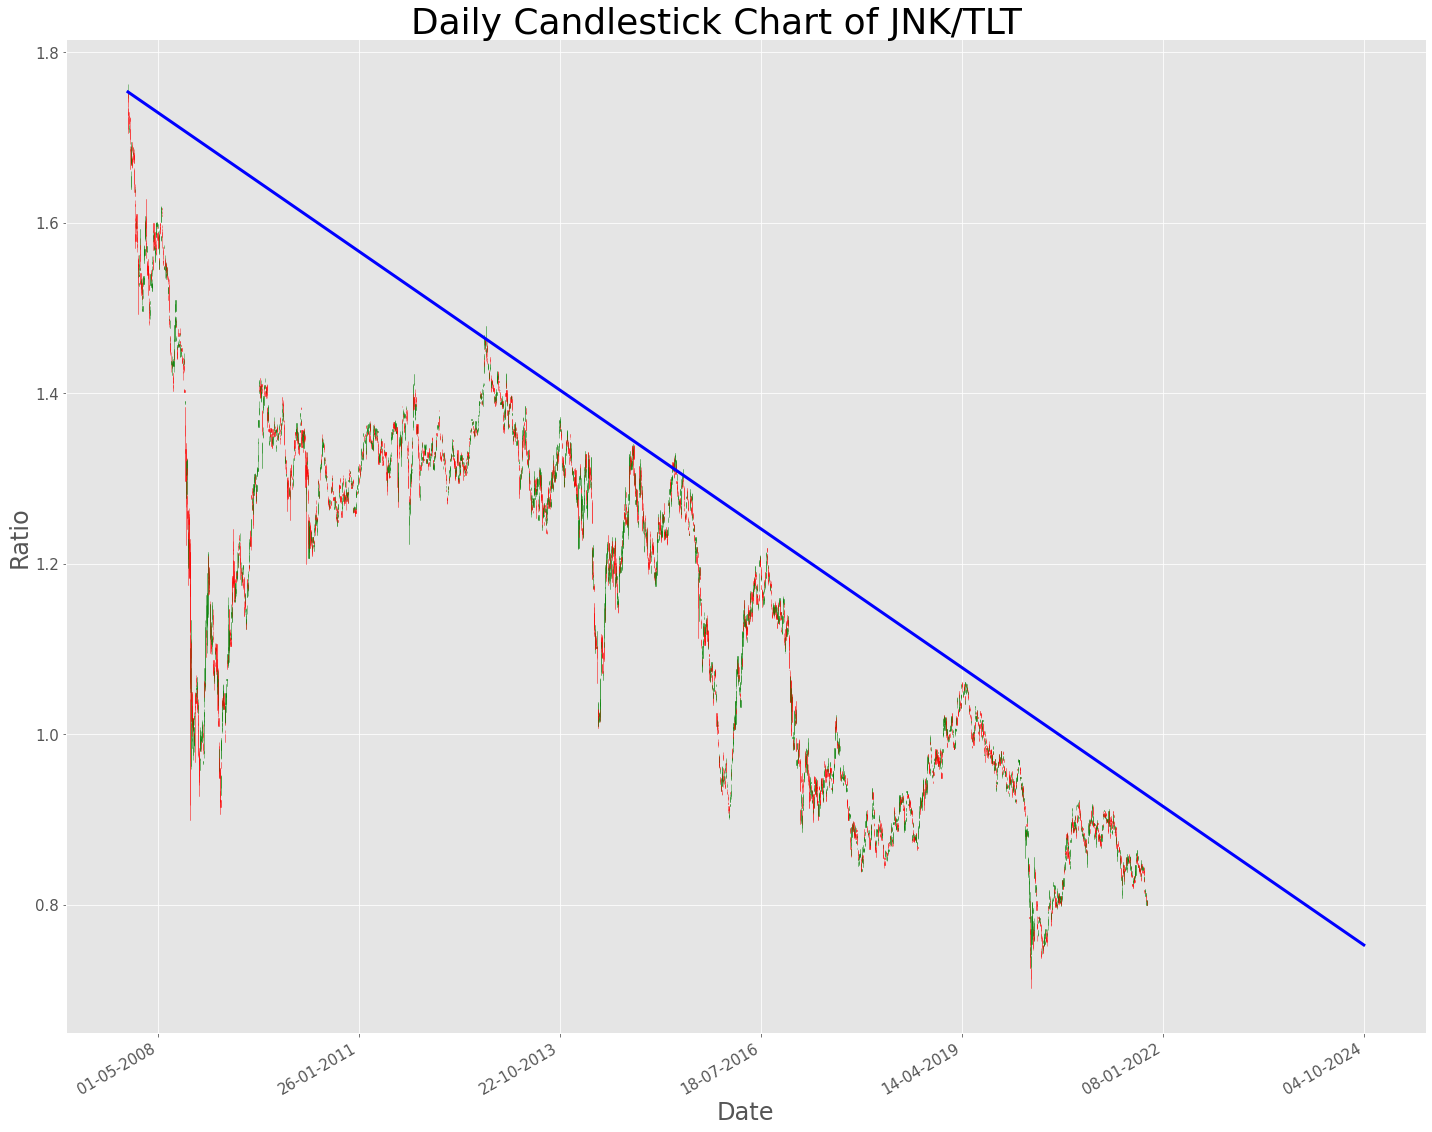

In [17]:
#Resistance Points
x_values = [point1[0],point3[0]]
y_values = [point1[1],point3[1]]

# Creating Subplots
fig, ax = plt.subplots(figsize=(20,16))

candlestick_ohlc(ax, chart.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

# Setting labels & titles
plt.xlabel('Date',fontsize=24)
plt.ylabel('Ratio',fontsize=24)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.suptitle('Daily Candlestick Chart of JNK/TLT',fontsize=36)

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()

# Plotting Resistance Line
plt.plot(x_values,y_values,color='blue',linewidth=3)

plt.show()

Let's add some support line as well!

In [18]:
support1x = [13852,20000]
support1y = [0.9,0.9]

support2x = [13852,20000]
support2y = [0.7,0.7]

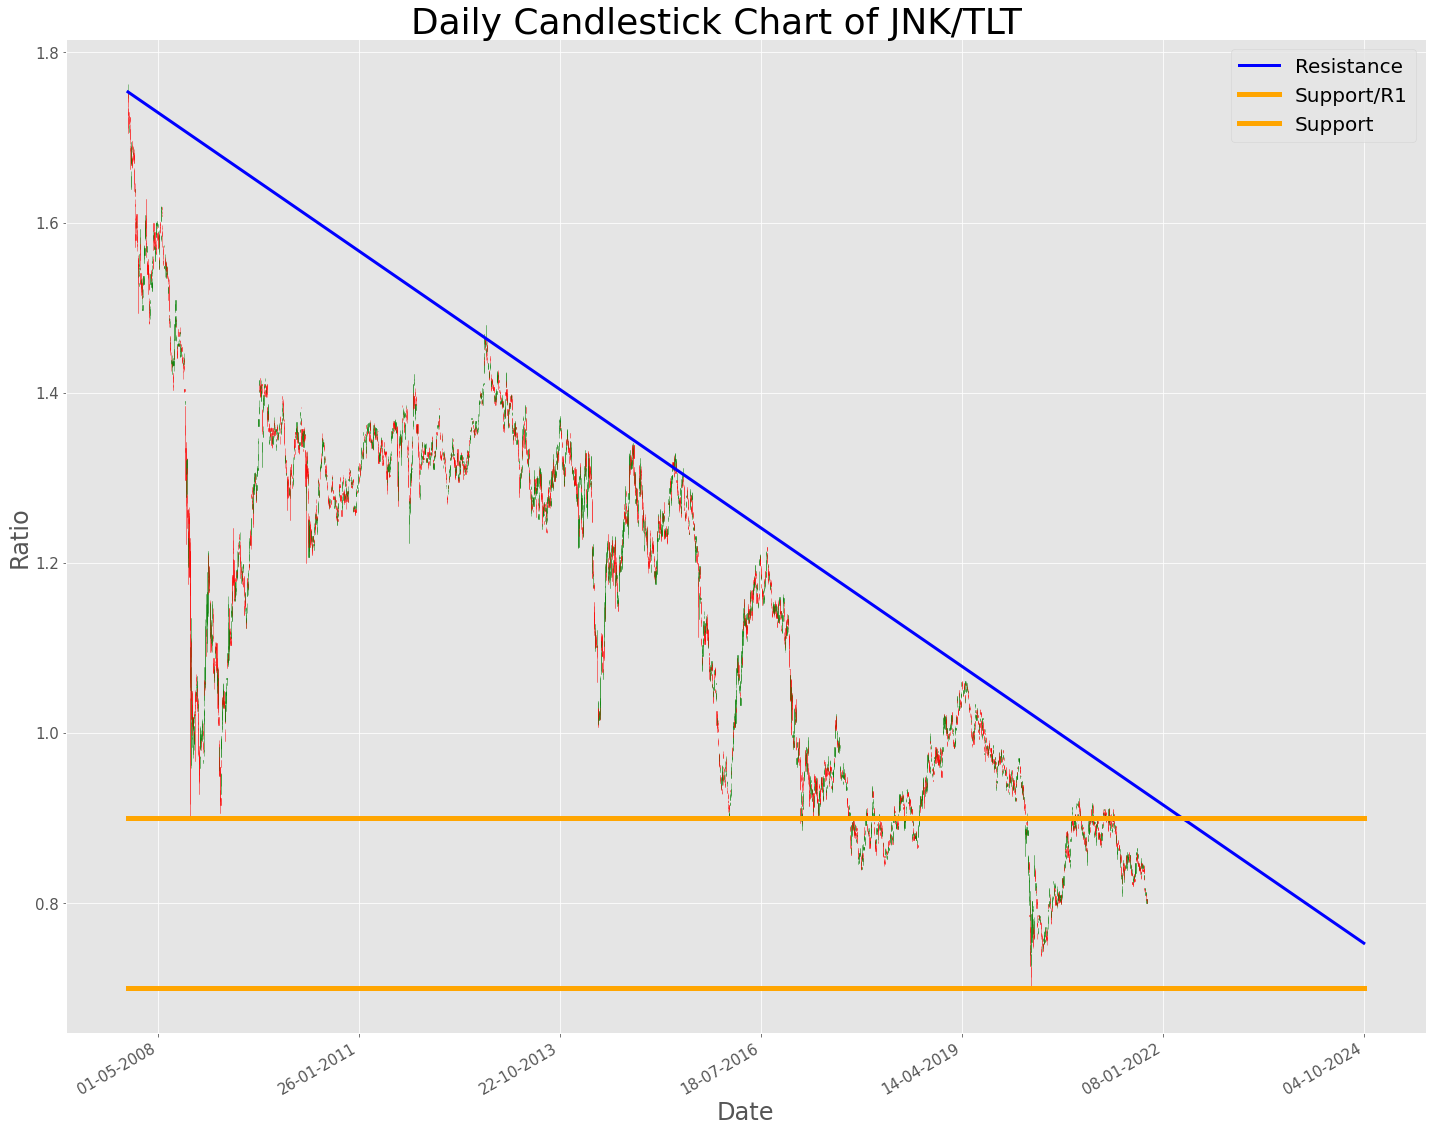

In [19]:
# Creating Subplots
fig, ax = plt.subplots(figsize=(20,16))

candlestick_ohlc(ax, chart.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

# Setting labels & titles
plt.xlabel('Date',fontsize=24)
plt.ylabel('Ratio',fontsize=24)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.suptitle('Daily Candlestick Chart of JNK/TLT',fontsize=36)

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()

#Resistance Points
x_values = [point1[0],point3[0]]
y_values = [point1[1],point3[1]]

# Plotting Resistance Line
plt.plot(x_values,y_values,color='blue',linewidth=3,label="Resistance")

#Plotting Support Lines
plt.plot(support1x,support1y,color='orange',linewidth=5,label="Support/R1")
plt.plot(support2x,support2y,color='orange',linewidth=5,label="Support")
plt.legend(fontsize=20)
plt.show()

From the resistance and support lines we have drawn, the ratio of JNK/TLT leans toward a double bottom formation in the next 1-2 years.

### End of Series 1